In [69]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [70]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

X_train, X_validate, y_train, y_validate = train_test_split(X, y)

In [71]:

train_x_01 = X_train/255
validate_x_01 = X_validate/255

y_train_r = np.asarray(y_train).astype('float32' ).reshape((-1,1))
y_validate_r = np.asarray(y_validate).astype('float32').reshape((-1,1))

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Lambda, Dense, Flatten, Input

model = Sequential()

model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
#model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2))
#model.add(Activation("sigmoid", name="gender_output"))
model.add(layers.Dense(1, activation="sigmoid"))

In [72]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [73]:
model.fit(train_x_01, y_train, epochs=20, verbose=0)

BACC = 85.72557822107017


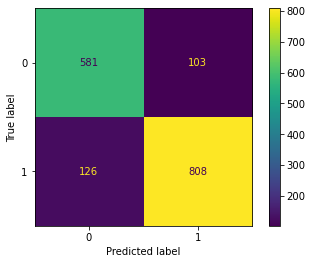

In [74]:
y_hat = (model.predict(validate_x_01) > 0.5).astype("int32")
bacc = balanced_accuracy_score(y_validate, y_hat)

cm = confusion_matrix(y_validate, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")